# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## Introduction to scikit-image

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

Pretty printing has been turned OFF


### Image in skimage

The first step of this practise is to learn the procedure to deal with image in `python`.

In this regard, you will need to refer to two main modules of *skimage*. The first module will give all information about [input-output](http://scikit-image.org/docs/dev/api/skimage.io.html) in order to read, write, and show image. The second module is as important and refers to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) which allow you to know what is the data type of the images.

#### IO module

In this part, you will rely on the module **io** of the `skimage`. This module can be imported as:

In [2]:
from skimage import io

Now, any function of this module can be called by `io.name_of_the_function`. See the following [webpage](http://scikit-image.org/docs/dev/api/skimage.io.html) to know all the functions available and the arguments of each of them.

##### imread() and imshow()

We will first play with the functions `io.imread()` and `io.imshow()` in order to read and show images. Refer to the documentation to know about the input and output arguments associated with this function. 

**The first task will be to read the grayscale image called `lena-grey.bmp` and show the output.**

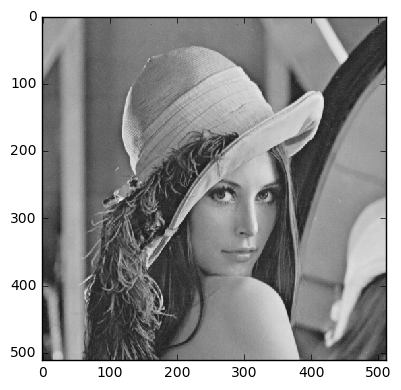

In [3]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Show Lena
io.imshow(lena_im)

**In order to understand, the data type of this image, you can print the shape and data type of the image read.** Refer to function [`shape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [`dtype()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) from the `numpy` library.

In [ ]:
# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

The `io.imshow()` function is provided by the `skimage` library. However, it is interesting to know that this function is herited from the very well known `matplotlib` library. This library has been imported in the preamble of this document and can be called with the prefix `plt`. For instance, we can show an image as:

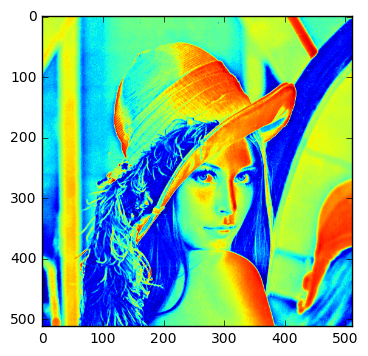

In [5]:
# Show the same image using matplotlib library
plt.imshow(lena_im)

You can see that this image is displayed with false color. Each gray level is replaced by a given color. In this specific case, bright colors are represented by red-ish and dark colors by blue-ish. This mapping is known as `colormap`. To obtain similar results than in `skimage`, we need to apply a grey colormap. More information about colormap can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).


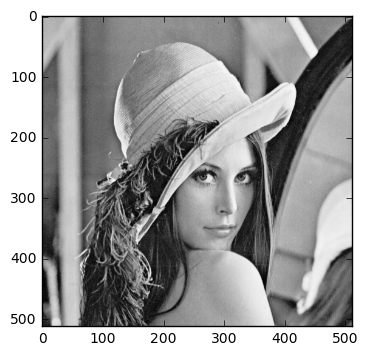

In [6]:
# Show the same image using matplotlib library and a grey colormap
plt.imshow(lena_im, cmap=cm.Greys_r)

You can do the same manipulation and open a color image using the file `vibot-color.jpg`

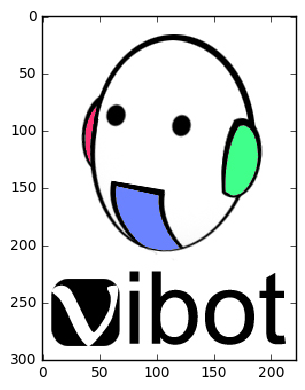

In [7]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

**Check the documentation of the function `imread` and open the previous color image as a grey scale image.**

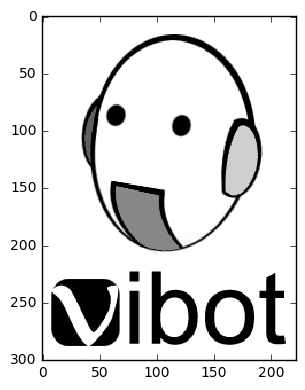

In [8]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename, as_grey=True)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

Observe attentively the change of the data type.

##### Data type

It is important to understand which type of data do you obtain once the image is loaded. Subsequent algorithms will require a certain type (*ie.*, float, unsigned int) included in a certain data range. That is why, you need to refer to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) in order to perform the right conversion between types.

**Re-open the data from the grey-scale image `lena-grey.bmp` and print the matrix and the type which have been loaded by default.**

In [10]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

print lena_im

A set of functions allow to make automatic conversion between type and range and can be called as `img_as_type()`. 

Usually, algorithms expect images as float type in the range [0.0, 1.0]. However, the previous data were coded with 8-bits unsigned integer. 

**Convert the data into float included in the range [0.0, 1.0].**

In [ ]:
# Import the utility function
from skimage import img_as_float

# Make the conversion
lena_im_float = img_as_float(lena_im)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im_float.shape, lena_im_float.dtype)

print lena_im_float

Lets save the created float image using the **io** module from skimage

In [ ]:
io.imsave('images/lena_float.png', lena_im_float)

Now lets see the distribition of the intensity values within a image.
Unofrtunately a function equivalent to imhinst in matlab has not been developed in skimage, however you can use the following function. 

In [13]:
from skimage import data, img_as_float
from skimage import exposure

def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    
    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])


    return  ax_img, ax_hist  
    


Providing the axes of the plots in order to show an image and its histogram 

In [ ]:
# Display figures
fig = plt.figure(figsize=(8, 5))
# Creating the axes with two subplot
axes = np.zeros((2,1), dtype=np.object)
axes[0,0] = fig.add_subplot(2, 1, 1)
axes[1,0] = fig.add_subplot(2, 1, 2)

### Now show the histogram of lena_im using the created axes (axes[:,0])
##...
ax_img, ax_hist = plot_img_and_hist(lena_im, axes[:,0])

From now, you are good to go in the world of digital image processing. However, always take care about the type of data you are dealing with and what results you are expecting from the different processes.